In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df= pd.read_csv('/content/Zoo.csv')

In [ ]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.shape

(101, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

In [ ]:
# Drop any rows with missing values (if any)
df.dropna(inplace=True)

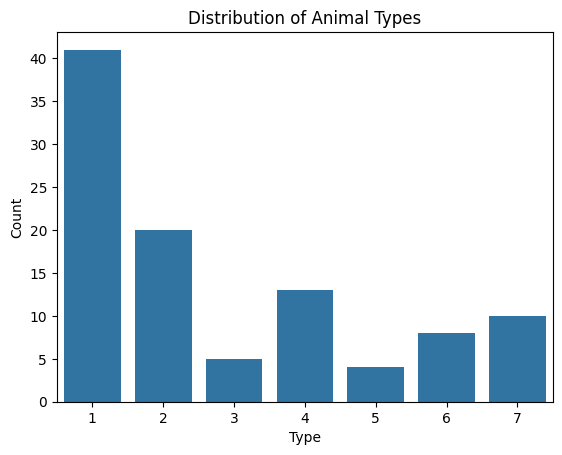

In [ ]:
# Visualize the distribution of animal types
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Features and target variable
X = df.drop(columns='type')
y = df['type']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80, 17)
Testing set size: (21, 17)


In [ ]:
# Initialize the KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Handle non-numeric data in X_train
X_train_encoded = pd.get_dummies(X_train)

In [ ]:
# Train the model using the encoded data
knn.fit(X_train_encoded, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score

# Apply one-hot encoding to both training and test data together
# This ensures consistent columns across both datasets
combined_data = pd.concat([X_train, X_test])
combined_encoded = pd.get_dummies(combined_data)

# Split the encoded data back into training and test sets
X_train_encoded = combined_encoded.iloc[:len(X_train)]
X_test_encoded = combined_encoded.iloc[len(X_train):]

accuracies = {}
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_encoded, y_train)

    y_pred = knn.predict(X_test_encoded)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[k] = accuracy
    print(f"K={k}, Accuracy={accuracy}")

# Choose the best K based on accuracy
best_k = max(accuracies, key=accuracies.get)
print(f"Best K value: {best_k} with accuracy {accuracies[best_k]}")

K=1, Accuracy=1.0
K=2, Accuracy=1.0
K=3, Accuracy=0.9523809523809523
K=4, Accuracy=0.9523809523809523
K=5, Accuracy=0.9047619047619048
K=6, Accuracy=0.9047619047619048
K=7, Accuracy=0.8571428571428571
K=8, Accuracy=0.8571428571428571
K=9, Accuracy=0.8571428571428571
K=10, Accuracy=0.8571428571428571
Best K value: 1 with accuracy 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set using the best K
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train_encoded, y_train)
y_pred = knn.predict(X_test_encoded)

In [ ]:
# Evaluate the model

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


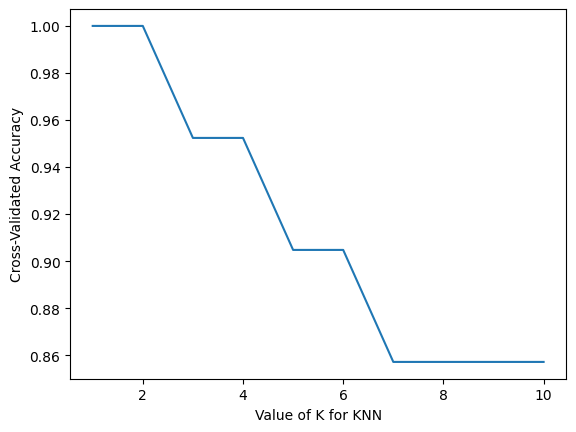

In [ ]:
import matplotlib.pyplot as plt

k_range = list(accuracies.keys())
k_scores = list(accuracies.values())

# plot to see clearly
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Interview Questions:



1. What are the key hyperparameters in KNN?

Ans:-

Key Hyperparameters in KNN

1. Number of Neighbors (n_neighbors):
    
    How many nearest neighbors to consider for making decisions.

2. Weight Function (weights):

    How neighbors' influence is weighted:
    'uniform': All neighbors have equal weight.
    'distance': Closer neighbors have more weight.

3. Algorithm (algorithm):

    Method to find neighbors:
    'auto', 'ball_tree', 'kd_tree', 'brute'.

4. Distance Metric (p):

    Determines distance calculation:
    p = 1: Manhattan distance.
    p = 2: Euclidean distance.

2. What distance metrics can be used in KNN?

Ans:-

Distance Metrics in KNN

1. Euclidean Distance:

    The most common distance metric, calculated as the square root of the sum of squared differences between coordinates.


2. Manhattan Distance:

    Also known as L1 norm, it is the sum of the absolute differences between coordinates.


3. Minkowski Distance:

    A generalization of Euclidean and Manhattan distances. It uses the parameter p to adjust the distance calculation.


4. Chebyshev Distance:

    The maximum absolute difference between coordinates. This is equivalent to the L∞ norm.


5. Hamming Distance:

    Used for categorical variables, it measures the proportion of differing categorical attributes between two points.

6. Cosine Similarity:

    Measures the cosine of the angle between two vectors. It is often used in text classification and clustering.